# Introduction - Exploratory Analysis

In this notebook, we will conduct an analysis of the data previously prepared in the path: `data/interim/hockey_teams.json`. This file, being partially processed, is easily accessible for import and ready for more detailed analytical examination.

This part of the workshop will focus on utilizing `pandas` and `matplotlib`, which were discussed during the course. The main objective is to familiarize ourselves with the dataset we are working on. Through a series of exercises:  
- we will get to know the structure of the data,  
- we will conduct elementary data exploration (EDA).

## Column Description

Below is a brief description of each column in our dataset:

- **Team Name**: The name of the team participating in the match.
- **Year**: The year in which the season takes place.
- **Wins**: The number of matches won by the team in the given season.
- **Losses**: The number of matches lost by the team in the given season.
- **OT Losses**: The number of matches lost by the team in overtime in the given season.
- **Win %**: The percentage of matches won by the team in the given season.
- **Goals For (GF)**: The number of goals scored by the team in the given season.
- **Goals Against (GA)**: The number of goals conceded by the team in the given season.
- **+ / -**: The difference between the number of goals scored and conceded by the team in the given season.

> Note: At this stage, certain significant simplifications were intentionally made in the analysis and they will not be explicitly mentioned, aiming for a discussion at the end of the workshop.

# Preparation

## Import libraries
Here, load the libraries that will be needed in the following steps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

plt.style.use("ggplot")

INTERIM_DIR = Path("data/interim")
data_path = INTERIM_DIR / "hockey_teams.csv"

df = pd.read_csv(data_path)

print(f"Načteno {len(df)} řádků a {len(df.columns)} sloupců")
df.head()

Načteno 607 řádků a 9 sloupců


,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


# Loading the Dataset

We recommend loading the raw data into a variable with the suffix `_raw`. This will avoid the need to reload the data from the beginning in case of an error, which can be a time-consuming process.  
  
> **Tip:** A `json` file can be easily loaded using `pandas` with the `read_json` function - [click](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)  

Load data from the `hockey_teams` file here

In [2]:
import pandas as pd
from pathlib import Path

data_path = Path("data/interim/hockey_teams.json")

df_raw = pd.read_json(data_path)

print(f"Načteno {len(df_raw)} řádků a {len(df_raw.columns)} sloupců")
df_raw.head()

Načteno 607 řádků a 9 sloupců


,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25


Check here if the data loaded correctly

In [3]:
print("Přehled datového rámce:")
print(df_raw.info(), "\n")

print("Ukázka prvních 5 záznamů:")
display(df_raw.head())

print(f"Počet řádků: {len(df_raw)}")
print(f"Počet sloupců: {len(df_raw.columns)}")

empty_teams = df_raw["Team Name"].isna().sum() + (df_raw["Team Name"] == "").sum()
print(f"Počet záznamů bez názvu týmu: {empty_teams}")

Přehled datového rámce:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team Name           607 non-null    object 
 1   Year                607 non-null    int64  
 2   Wins                607 non-null    int64  
 3   Losses              607 non-null    int64  
 4   OT Losses           607 non-null    object 
 5   Win %               607 non-null    float64
 6   Goals For (GF)      607 non-null    int64  
 7   Goals Against (GA)  607 non-null    int64  
 8   + / -               607 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 42.8+ KB
None 

Ukázka prvních 5 záznamů:


,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25


Počet řádků: 607
Počet sloupců: 9
Počet záznamů bez názvu týmu: 0


# Preliminary Data Transformation

## Standardizing Column Names

Currently, our dataset contains original column names which, from a technical standpoint, should not contain spaces or other special characters.

In this section, we will standardize and simplify the naming conventions to facilitate data processing in subsequent stages. We will apply the following column name mapping:

- **Team Name** -> `team`
- **Year** -> `season`
- **Wins** -> `victories`
- **Losses** -> `defeats`
- **OT Losses** -> `overtime_defeats`
- **Win %** -> `victory_percentage`
- **Goals For (GF)** -> `scored_goals`
- **Goals Against (GA)** -> `received_goals`
- **\+ / -** -> `goal_difference`

> At this point, we recommend creating a new DataFrame without the `_raw` postfix. For example, if the data was loaded into the variable `df_raw`, we now want to work with the variable `df`, where we will modify the column names.

In [4]:
df = df_raw.copy()

rename_map = {
    "Team Name": "team",
    "Year": "season",
    "Wins": "victories",
    "Losses": "defeats",
    "OT Losses": "overtime_defeats",
    "Win %": "victory_percentage",
    "Goals For (GF)": "scored_goals",
    "Goals Against (GA)": "received_goals",
    "+ / -": "goal_difference"
}

df = df.rename(columns=rename_map)

print("Přejmenování sloupců dokončeno.")
print("Nové názvy sloupců:")
print(list(df.columns))
df.head()

Přejmenování sloupců dokončeno.
Nové názvy sloupců:
['team', 'season', 'victories', 'defeats', 'overtime_defeats', 'victory_percentage', 'scored_goals', 'received_goals', 'goal_difference']


,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25


## Removing Empty Values

As can be observed, the `overtime_defeats` column contains many empty values, and the expected data type is `int`. Before proceeding with further analysis, this column needs to be properly prepared.

To achieve this, we will perform the following steps:
- Check which symbol is used as an indicator of an empty field.
- Fill the empty fields with a value of 0.
- Then convert the data type of this column to `int`.

By following these steps, the `overtime_defeats` column will be ready for further analysis.

### Finding the Indicator of an Empty Field

In [5]:
unique_values = df["overtime_defeats"].unique()

print("Unikátní hodnoty ve sloupci 'overtime_defeats':")
print(unique_values)
print(f"\nPočet unikátních hodnot: {len(unique_values)}")

Unikátní hodnoty ve sloupci 'overtime_defeats':
['' '3' '4' '6' '5' '0' '2' '1' '8' '7' '9' '12' '16' '11' '13' '14' '15'
 '10' '18']

Počet unikátních hodnot: 19


### Overwriting Empty Values with 0

In [6]:
empty_before = (df["overtime_defeats"] == "").sum()
print(f"Počet prázdných hodnot před úpravou: {empty_before}")

df["overtime_defeats"] = df["overtime_defeats"].replace("", 0)

empty_after = (df["overtime_defeats"] == "").sum()
zeros_after = (df["overtime_defeats"] == 0).sum()

print(f"Počet prázdných hodnot po úpravě: {empty_after}")
print(f"Počet hodnot s nulou: {zeros_after}")

df[["team", "season", "overtime_defeats"]].head(10)

Počet prázdných hodnot před úpravou: 249
Počet prázdných hodnot po úpravě: 0
Počet hodnot s nulou: 249


,team,season,overtime_defeats
0,Boston Bruins,1990,0
1,Buffalo Sabres,1990,0
2,Calgary Flames,1990,0
3,Chicago Blackhawks,1990,0
4,Detroit Red Wings,1990,0
5,Edmonton Oilers,1990,0
6,Hartford Whalers,1990,0
7,Los Angeles Kings,1990,0
8,Minnesota North Stars,1990,0
9,Montreal Canadiens,1990,0


### Column Type Conversion

In [7]:
int_cols = [
    "season",
    "victories",
    "defeats",
    "overtime_defeats",
    "scored_goals",
    "received_goals",
    "goal_difference",
]

float_cols = ["victory_percentage"]

for c in int_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64")

for c in float_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

print("Přetypování hotovo.\n")
print(df.dtypes)

key_cols = ["team", "season", "victories", "defeats", "victory_percentage"]
missing = {c: int(df[c].isna().sum()) for c in key_cols if c in df.columns}
print("\nPočet chybějících hodnot v klíčových sloupcích:", missing)

df.head()

Přetypování hotovo.

team                   object
season                  Int64
victories               Int64
defeats                 Int64
overtime_defeats        Int64
victory_percentage    float64
scored_goals            Int64
received_goals          Int64
goal_difference         Int64
dtype: object

Počet chybějících hodnot v klíčových sloupcích: {'team': 0, 'season': 0, 'victories': 0, 'defeats': 0, 'victory_percentage': 0}


,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,0,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14
2,Calgary Flames,1990,46,26,0,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25


# Dataset Analysis

In this section, we will focus on answering fundamental questions about our dataset in the context of hockey games. The goal is to become familiar with the dataset and develop an intuition about it.  
  
Here is a list of exercises we will perform to find answers to key questions:  
  
- How many teams have participated in league games over the years?  
- What is the total number of available seasons?  
- What is the time span of the data?  
- Are there any suspicious or outlier values in the numerical columns?  
  
These exercises will help us better understand the structure and nature of our data.  

### Number of teams that participated in league matches

Here, indicate the total number of teams available in our dataset

In [8]:
num_teams = df["team"].nunique()

print(f"Celkový počet unikátních týmů v datasetu: {num_teams}")

Celkový počet unikátních týmů v datasetu: 35


### Total number of seasons

Here, indicate the total number of seasons.

In [9]:
num_seasons = df["season"].nunique()

print(f"Celkový počet dostupných sezón v datasetu: {num_seasons}")

Celkový počet dostupných sezón v datasetu: 21


### Time Span of Data

Here, we will examine the availability of data for individual seasons. The analysis will be conducted in two stages:  
- First, we will determine the time range of the data by identifying the start year (`start_year`) and the end year (`end_year`). This will allow us to establish for which seasons we have information.  
- Next, we will look for any gaps in the time data to ensure that we have a complete set of information for each season.   

At this point, we will determine the start year and end year of the data:

In [10]:
start_year = df["season"].min()
end_year = df["season"].max()

print(f"Data pokrývají období od roku {start_year} do roku {end_year}.")
print(f"Celkově {end_year - start_year + 1} let datového pokrytí.")

Data pokrývají období od roku 1990 do roku 2011.
Celkově 22 let datového pokrytí.


Here, we will check if data is present for each year within the determined range:

In [11]:
start_year = df["season"].min()
end_year = df["season"].max()

expected_years = list(range(start_year, end_year + 1))

available_years = sorted(df["season"].unique())

missing_years = sorted(set(expected_years) - set(available_years))

print(f"Očekávané roky: {start_year}–{end_year}")
print(f"Počet očekávaných sezón: {len(expected_years)}")
print(f"Počet dostupných sezón: {len(available_years)}")

if missing_years:
    print(f"Chybějící sezóny v datech: {missing_years}")
else:
    print("Všechna sezónní data jsou kompletní — žádné mezery nebyly nalezeny.")

print("\nPočet týmů v jednotlivých sezónách:")
print(df["season"].value_counts().sort_index())

Očekávané roky: 1990–2011
Počet očekávaných sezón: 22
Počet dostupných sezón: 21
Chybějící sezóny v datech: [2004]

Počet týmů v jednotlivých sezónách:
season
1990    42
1991    26
1992    24
1993    26
1994    26
1995    26
1996    26
1997    26
1998    27
1999    28
2000    30
2001    30
2002    30
2003    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
Name: count, dtype: Int64


### Analysis of Numerical Columns

Here we will examine the basic descriptive statistics for numerical columns.

To this end, describe and analyze the results for the following columns:

- victories
- defeats
- overtime_defeats
- victory_percentage
- scored_goals
- received_goals
- goal_difference

We are interested in the following statistics:
- mean,
- count,
- standard deviation,
- percentiles = `[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]`

In [12]:
num_cols = [
    "victories",
    "defeats",
    "overtime_defeats",
    "victory_percentage",
    "scored_goals",
    "received_goals",
    "goal_difference"
]

stats = df[num_cols].describe(
    percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]
).T  

stats = stats.round(3)

print("Základní popisné statistiky pro numerické sloupce:\n")
display(stats)

Základní popisné statistiky pro numerické sloupce:



,count,mean,std,min,0%,5%,10%,25%,50%,75%,90%,95%,100%,max
victories,607.0,36.841845,8.902925,9.0,9.0,21.3,24.6,31.0,38.0,43.0,48.0,50.0,62.0,62.0
defeats,607.0,32.443163,8.383721,11.0,11.0,20.0,23.0,27.0,32.0,37.0,43.0,47.0,71.0,71.0
overtime_defeats,607.0,4.400329,4.600854,0.0,0.0,0.0,0.0,0.0,4.0,8.0,11.0,13.0,18.0,18.0
victory_percentage,607.0,0.457389,0.102289,0.119,0.119,0.2818,0.3194,0.39,0.463,0.5245,0.585,0.6172,0.756,0.756
scored_goals,607.0,235.818781,41.128312,115.0,115.0,176.3,191.6,212.0,234.0,257.0,286.4,309.4,369.0,369.0
received_goals,607.0,235.823723,42.893416,115.0,115.0,169.0,188.0,208.0,234.0,262.0,289.0,305.0,414.0,414.0
goal_difference,607.0,-0.004942,45.449152,-196.0,-196.0,-73.4,-57.4,-27.0,3.0,31.5,54.0,68.0,144.0,144.0


# `team`

In this section, we will conduct a series of analyses on individual teams participating in the leagues. This will allow us to identify the teams that have performed best in the competitions over the years.


## Analysis of Team Participation in League Seasons
Let's perform the following exercises:

- Check how many teams have participated in all seasons of the selected league.
- Display the list of these teams.

In [13]:
team_seasons = df.groupby("team")["season"].nunique()

total_seasons = df["season"].nunique()

teams_all_seasons = team_seasons[team_seasons == total_seasons].index.tolist()

print(f"Počet týmů, které hrály ve všech {total_seasons} sezónách: {len(teams_all_seasons)}\n")
print("Seznam těchto týmů:")
for team in teams_all_seasons:
    print("-", team)

Počet týmů, které hrály ve všech 21 sezónách: 17

Seznam těchto týmů:
- Boston Bruins
- Buffalo Sabres
- Calgary Flames
- Chicago Blackhawks
- Detroit Red Wings
- Edmonton Oilers
- Los Angeles Kings
- Montreal Canadiens
- New Jersey Devils
- New York Islanders
- New York Rangers
- Philadelphia Flyers
- Pittsburgh Penguins
- St. Louis Blues
- Toronto Maple Leafs
- Vancouver Canucks
- Washington Capitals


List of teams that participated in all seasons of hockey competitions:

In [14]:
print(f"Týmy, které hrály všechny sezóny mezi {start_year} a {end_year} (s výjimkou roku 2004):\n")

for i, team in enumerate(teams_all_seasons, start=1):
    print(f"{i}. {team}")

print(f"\nCelkový počet stálých týmů: {len(teams_all_seasons)} z {df['team'].nunique()} celkových týmů.")

Týmy, které hrály všechny sezóny mezi 1990 a 2011 (s výjimkou roku 2004):

1. Boston Bruins
2. Buffalo Sabres
3. Calgary Flames
4. Chicago Blackhawks
5. Detroit Red Wings
6. Edmonton Oilers
7. Los Angeles Kings
8. Montreal Canadiens
9. New Jersey Devils
10. New York Islanders
11. New York Rangers
12. Philadelphia Flyers
13. Pittsburgh Penguins
14. St. Louis Blues
15. Toronto Maple Leafs
16. Vancouver Canucks
17. Washington Capitals

Celkový počet stálých týmů: 17 z 35 celkových týmů.


The number of teams that have played in all seasons:

In [15]:
num_teams_all_seasons = len(teams_all_seasons)

print(f"Počet týmů, které hrály ve všech sezónách: {num_teams_all_seasons}")

Počet týmů, které hrály ve všech sezónách: 17


## Best Performing Teams in League History

Let's list the five best teams with the highest average `victory_percentage` over all years, presenting the data broken down by individual teams and seasons.

In [16]:
team_avg_victory = (
    df.groupby("team")["victory_percentage"]
    .mean()
    .sort_values(ascending=False)
)

top5_teams = team_avg_victory.head(5).index.tolist()

print("Pět historicky nejúspěšnějších týmů podle průměrné výhernosti:\n")
for i, (team, avg) in enumerate(team_avg_victory.head(5).items(), start=1):
    print(f"{i}. {team} — průměrná výhernost: {avg:.3f}")

top5_df = df[df["team"].isin(top5_teams)][["team", "season", "victory_percentage"]]

print("\nVýhernost těchto týmů po sezónách:")
display(top5_df.sort_values(["team", "season"]).reset_index(drop=True))

Pět historicky nejúspěšnějších týmů podle průměrné výhernosti:

1. Detroit Red Wings — průměrná výhernost: 0.579
2. New Jersey Devils — průměrná výhernost: 0.528
3. Anaheim Ducks — průměrná výhernost: 0.522
4. Dallas Stars — průměrná výhernost: 0.517
5. Colorado Avalanche — průměrná výhernost: 0.516

Výhernost těchto týmů po sezónách:


,team,season,victory_percentage
0,Anaheim Ducks,2006,0.585
1,Anaheim Ducks,2007,0.573
2,Anaheim Ducks,2008,0.512
3,Anaheim Ducks,2009,0.476
4,Anaheim Ducks,2010,0.573
...,...,...,...
79,New Jersey Devils,2007,0.561
80,New Jersey Devils,2008,0.622
81,New Jersey Devils,2009,0.585
82,New Jersey Devils,2010,0.463


## Top Teams in History

Let's determine the top 5 teams that have won the most league titles in entire history. Let's consider whether, based on the available data, we can identify a single team that unquestionably deserves the title of the best in history.

For simplicity, let's assume that the league winner is the team with the most victories in a given season.

> Hint: The information contained in the article `Pandas > Summary of the 4th Meeting > Analytical Functions` may be useful.

In [17]:
winners_by_season = (
    df.loc[df.groupby("season")["victories"].idxmax(), ["season", "team", "victories"]]
    .sort_values("season")
    .reset_index(drop=True)
)

titles_count = (
    winners_by_season["team"]
    .value_counts()
    .rename_axis("team")
    .reset_index(name="titles_won")
)

top5_titles = titles_count.head(5)

print("Týmy s největším počtem ligových vítězství (podle počtu sezón s nejvíce výhrami):\n")
display(top5_titles)

print("\n📅 Přehled vítězů jednotlivých sezón:")
display(winners_by_season)

Týmy s největším počtem ligových vítězství (podle počtu sezón s nejvíce výhrami):



,team,titles_won
0,Detroit Red Wings,6
1,New York Rangers,3
2,Dallas Stars,2
3,Colorado Avalanche,2
4,Pittsburgh Penguins,1



📅 Přehled vítězů jednotlivých sezón:


,season,team,victories
0,1990,Chicago Blackhawks,49
1,1991,New York Rangers,50
2,1992,Pittsburgh Penguins,56
3,1993,New York Rangers,52
4,1994,Detroit Red Wings,33
5,1995,Detroit Red Wings,62
6,1996,Colorado Avalanche,49
7,1997,Dallas Stars,49
8,1998,Dallas Stars,51
9,1999,St. Louis Blues,51


Additionally, we will determine how many teams have **never won any season**.  
  
> **Note:** This task may seem more complex than it appears at first glance. Remember, during classes you can rely on the instructor's help, and outside of them - on the support of a mentor.

In [20]:
team_aliases = {
    "Mighty Ducks of Anaheim": "Anaheim Ducks",
    "Quebec Nordiques": "Colorado Avalanche",
    "Hartford Whalers": "Carolina Hurricanes",
    "Atlanta Thrashers": "Winnipeg Jets",
    "Phoenix Coyotes": "Arizona Coyotes",   # moderní název
    "Minnesota North Stars": "Dallas Stars",
}

df_norm = df.copy()
df_norm["team_norm"] = df_norm["team"].replace(team_aliases)

stanley_cup_champ_by_season_start = {
    1990: "Pittsburgh Penguins",   # 1990/91
    1991: "Pittsburgh Penguins",   # 1991/92
    1992: "Montreal Canadiens",    # 1992/93
    1993: "New York Rangers",      # 1993/94
    1994: "New Jersey Devils",     # 1994/95
    1995: "Colorado Avalanche",    # 1995/96 (ex-Quebec)
    1996: "Detroit Red Wings",     # 1996/97
    1997: "Detroit Red Wings",     # 1997/98
    1998: "Dallas Stars",          # 1998/99
    1999: "New Jersey Devils",     # 1999/00
    2000: "Colorado Avalanche",    # 2000/01
    2001: "Detroit Red Wings",     # 2001/02
    2002: "New Jersey Devils",     # 2002/03
    2003: "Tampa Bay Lightning",   # 2003/04
    2005: "Carolina Hurricanes",   # 2005/06
    2006: "Anaheim Ducks",         # 2006/07 (ex-Mighty Ducks)
    2007: "Detroit Red Wings",     # 2007/08
    2008: "Pittsburgh Penguins",   # 2008/09
    2009: "Chicago Blackhawks",    # 2009/10
    2010: "Boston Bruins",         # 2010/11
    2011: "Los Angeles Kings",     # 2011/12
}

champs_set = {
    team_aliases.get(name, name) 
    for year, name in stanley_cup_champ_by_season_start.items()
}

participants_set = set(df_norm["team_norm"].unique())

never_stanley_cup = sorted(participants_set - champs_set)

print(f"Počet týmů bez Stanley Cupu (1990/91–2011/12): {len(never_stanley_cup)}\n")
print("Seznam:")
for t in never_stanley_cup:
    print("-", t)


Počet týmů bez Stanley Cupu (1990/91–2011/12): 17

Seznam:
- Arizona Coyotes
- Buffalo Sabres
- Calgary Flames
- Columbus Blue Jackets
- Edmonton Oilers
- Florida Panthers
- Minnesota Wild
- Nashville Predators
- New York Islanders
- Ottawa Senators
- Philadelphia Flyers
- San Jose Sharks
- St. Louis Blues
- Toronto Maple Leafs
- Vancouver Canucks
- Washington Capitals
- Winnipeg Jets


# `overtime_defeats`

The `overtime_defeats` variable informs us how many times a team lost in overtime throughout the year.  
  
In this section, we will perform the following exercises:  
- Identify the team that most frequently lost in overtime.  
- Rank the teams based on the number of overtime losses.  
- Calculate what percentage of teams lost at least once in overtime.  
- Determine the season with the highest number of games decided in overtime.  
  
> Let's make sure that the `overtime_defeats` column is of numeric type!  

## The team losing most frequently in overtime

> Note: To solve this task, this article might be useful: `Pandas > Conference Summary > Analytical Functions`

In [21]:
import pandas as pd

df["overtime_defeats"] = pd.to_numeric(df["overtime_defeats"], errors="coerce")

team_most_ot_losses = (
    df.groupby("team")["overtime_defeats"]
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print("Tým s nejvyšším počtem proher v prodloužení (všechna období):")
display(team_most_ot_losses)

ranking_ot_losses = (
    df.groupby("team")["overtime_defeats"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
print("\nŽebříček týmů podle celkového počtu proher v prodloužení:")
display(ranking_ot_losses.head(10))

teams_with_any_ot_loss = (df.groupby("team")["overtime_defeats"].sum() > 0).sum()
total_teams = df["team"].nunique()
percentage_ot_teams = (teams_with_any_ot_loss / total_teams) * 100

print(f"\nProcento týmů, které alespoň jednou prohrály v prodloužení: {percentage_ot_teams:.1f}%")

season_most_ot_losses = (
    df.groupby("season")["overtime_defeats"]
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
print("\nSezóna s nejvyšším počtem zápasů rozhodnutých v prodloužení:")
display(season_most_ot_losses)

Tým s nejvyšším počtem proher v prodloužení (všechna období):


team
Florida Panthers    124
Name: overtime_defeats, dtype: Int64


Žebříček týmů podle celkového počtu proher v prodloužení:


,team,overtime_defeats
0,Florida Panthers,124
1,Boston Bruins,106
2,St. Louis Blues,101
3,Toronto Maple Leafs,96
4,Montreal Canadiens,96
5,Tampa Bay Lightning,96
6,San Jose Sharks,94
7,Calgary Flames,94
8,Edmonton Oilers,94
9,Los Angeles Kings,93



Procento týmů, které alespoň jednou prohrály v prodloužení: 91.4%

Sezóna s nejvyšším počtem zápasů rozhodnutých v prodloužení:


season
2009    301
Name: overtime_defeats, dtype: Int64

## Percentage of teams losing in overtime

The result of this task should be rounded to two decimal places

In [23]:
percentage_ot_teams_rounded = round(percentage_ot_teams, 2)

print(f"Procento týmů, které alespoň jednou prohrály v prodloužení: {percentage_ot_teams_rounded}%")

Procento týmů, které alespoň jednou prohrály v prodloužení: 91.43%


# `goals_ratio`

Based on the variables `scored_goals` and `received_goals`, we will create a new variable - `goals_ratio`, defined as the ratio of goals scored to goals conceded.

Before we proceed with solving the task, let's consider the following issues:
- What values of the `goals_ratio` statistic can be considered indicative of good or poor team performance?
- In what situations can we determine that a team performed better or worse based on the value of `goals_ratio`?

## Creating a Variable

In [24]:
df["goals_ratio"] = df["scored_goals"] / df["received_goals"].replace(0, pd.NA)

print("Základní popisná statistika pro 'goals_ratio':\n")
display(df["goals_ratio"].describe().round(3))

print("\nUkázka prvních 5 záznamů:")
display(df[["team", "season", "scored_goals", "received_goals", "goals_ratio"]].head())

Základní popisná statistika pro 'goals_ratio':



count    607.0
mean     1.019
std      0.187
min      0.506
25%      0.885
50%      1.013
75%      1.139
max      1.796
Name: goals_ratio, dtype: Float64


Ukázka prvních 5 záznamů:


,team,season,scored_goals,received_goals,goals_ratio
0,Boston Bruins,1990,299,264,1.132576
1,Buffalo Sabres,1990,292,278,1.05036
2,Calgary Flames,1990,344,263,1.307985
3,Chicago Blackhawks,1990,284,211,1.345972
4,Detroit Red Wings,1990,273,298,0.916107


Here we will perform a basic analysis of the variable by determining statistics such as:
- mean
- standard deviation
- quantiles 2, 3, 4

Let's consider what can be inferred from such a summary. Based on this, can we say that this statistic has outliers?

In [25]:
mean_ratio = df["goals_ratio"].mean()
std_ratio = df["goals_ratio"].std()

quantiles = df["goals_ratio"].quantile([0.25, 0.5, 0.75])

print("Statistická analýza proměnné 'goals_ratio':\n")
print(f"Průměr (mean): {mean_ratio:.3f}")
print(f"Směrodatná odchylka (std): {std_ratio:.3f}\n")

print("Kvantily:")
for q, v in quantiles.items():
    print(f"  {int(q*100)}% kvantil: {v:.3f}")

Statistická analýza proměnné 'goals_ratio':

Průměr (mean): 1.019
Směrodatná odchylka (std): 0.187

Kvantily:
  25% kvantil: 0.885
  50% kvantil: 1.013
  75% kvantil: 1.139


## Distribution of the variable `goals_ratio`

Let's generate the distribution of the variable `goals_ratio` using the `plt.hist` function from the `matplotlib` library, performing the task in two variants:
- with the number of bins determined using Rice's Rule,
- with the number of bins determined using the Square Root Rule.

Methods and formulas for determining the number of bins in a histogram can be found at this link: [Determining the number of bins in a histogram](https://www.statology.org/sturges-rule/).

**Tip:** To determine the distribution of a variable using `matplotlib`, you can use the `hist` function, available here: [Documentation for hist function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

What are the floor and ceiling of a number - [Floor and ceiling of a number - Wikipedia](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions)
> Question: How to calculate the ceiling of a number in Python without using additional libraries?

### Histogram of the variable using Rice's rule

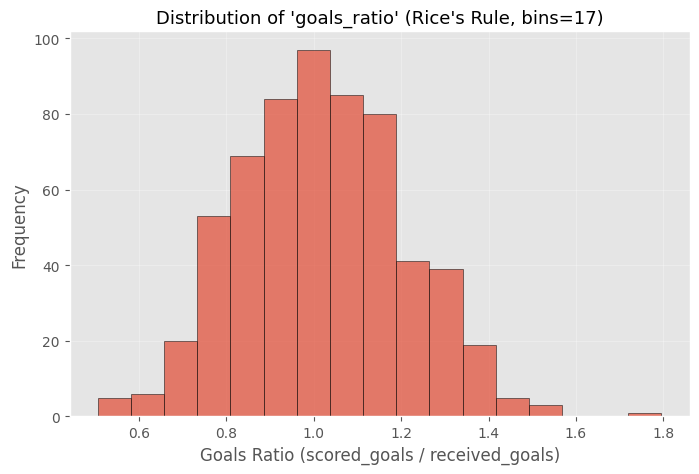

In [26]:
import matplotlib.pyplot as plt
import numpy as np

n = len(df["goals_ratio"].dropna())

bins_rice = int(np.ceil(2 * n ** (1/3)))

plt.figure(figsize=(8, 5))
plt.hist(df["goals_ratio"], bins=bins_rice, edgecolor="black", alpha=0.7)
plt.title(f"Distribution of 'goals_ratio' (Rice's Rule, bins={bins_rice})", fontsize=13)
plt.xlabel("Goals Ratio (scored_goals / received_goals)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

### Histogram of the variable using the square root rule

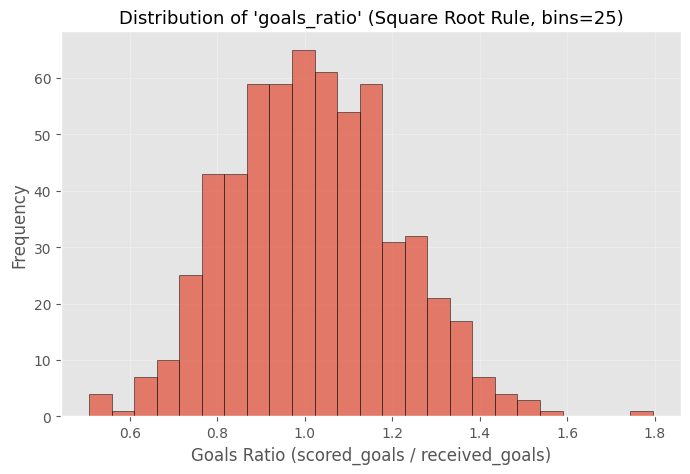

In [27]:
import matplotlib.pyplot as plt
import numpy as np

n = len(df["goals_ratio"].dropna())

bins_sqrt = int(np.ceil(np.sqrt(n)))

plt.figure(figsize=(8, 5))
plt.hist(df["goals_ratio"], bins=bins_sqrt, edgecolor="black", alpha=0.7)
plt.title(f"Distribution of 'goals_ratio' (Square Root Rule, bins={bins_sqrt})", fontsize=13)
plt.xlabel("Goals Ratio (scored_goals / received_goals)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# `victory_percentage`

Similar to the analysis of the variable `goals_ratio`, we will conduct an exploratory analysis of `victory_percentage` by following these steps:  
- Determine the basic descriptive statistics, such as the mean, median, standard deviation, minimum, and maximum.  
- Examine the distribution of the variable by using a histogram to better understand its characteristics.  
- Check if there are any obvious subgroups of teams within the variable under analysis that could be identified based on specific criteria, such as the range of the variable's values.

### Descriptive Statistics

In [28]:
mean_vp = df["victory_percentage"].mean()
median_vp = df["victory_percentage"].median()
std_vp = df["victory_percentage"].std()
min_vp = df["victory_percentage"].min()
max_vp = df["victory_percentage"].max()

print("Descriptive statistics for 'victory_percentage':\n")
print(f"Mean (průměr): {mean_vp:.3f}")
print(f"Median (medián): {median_vp:.3f}")
print(f"Standard deviation (směrodatná odchylka): {std_vp:.3f}")
print(f"Minimum: {min_vp:.3f}")
print(f"Maximum: {max_vp:.3f}")

Descriptive statistics for 'victory_percentage':

Mean (průměr): 0.457
Median (medián): 0.463
Standard deviation (směrodatná odchylka): 0.102
Minimum: 0.119
Maximum: 0.756


### Distribution

Here we will create the distribution of the variable, but we won't be doing it in two versions. Instead, we will choose a different, arbitrary number of intervals.

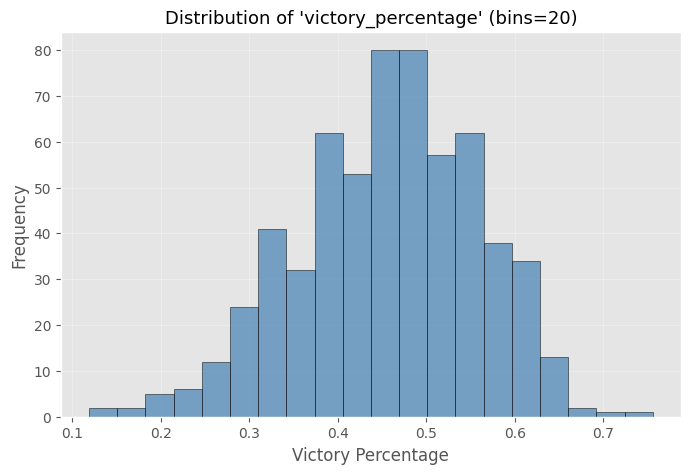

In [31]:
import matplotlib.pyplot as plt

bins_custom = 20

plt.figure(figsize=(8,5))
plt.hist(df["victory_percentage"], bins=bins_custom, color="steelblue", edgecolor="black", alpha=0.7)
plt.title(f"Distribution of 'victory_percentage' (bins={bins_custom})", fontsize=13)
plt.xlabel("Victory Percentage")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# `goals_ratio` vs `victory_percentage`

We have already analyzed `goals_ratio` and `victory_percentage` as two separate variables. Now, our task is to analyze them together to identify potential interdependencies between them.  
  
In this step, we will perform the following exercises:  
- Before starting the analysis, let’s consider whether these variables might be dependent or independent of each other. What kind of relationship can be expected based on their business descriptions?  
- We will create a scatterplot to visually represent the dependencies between these variables.  
- We will determine the relationship between the variables based on the scatterplot.  
- We will analyze the scatterplot to identify any outliers, paying special attention to their common distribution.

## Scatterplot of Variables

Now let's create a scatterplot for the two analyzed variables, `goals_ratio` and `victory_percentage`. After completing this step, let's answer the following questions:  
- What is the relationship between the variables `goals_ratio` and `victory_percentage`?  
- Can any outliers be identified in the plot? If so, what criteria were used to identify them?

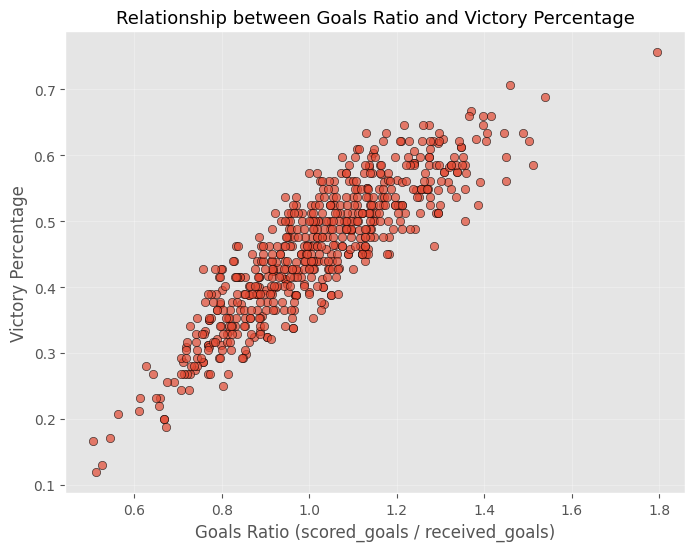

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["goals_ratio"], df["victory_percentage"], alpha=0.7, edgecolor="black")
plt.title("Relationship between Goals Ratio and Victory Percentage", fontsize=13)
plt.xlabel("Goals Ratio (scored_goals / received_goals)")
plt.ylabel("Victory Percentage")
plt.grid(alpha=0.3)
plt.show()

> space for chart analysis notes

If we have identified outlying observations at an earlier stage of analysis, let's now examine these specific cases. We will focus on outliers concerning the variables `goals_ratio` and `victory_percentage` to understand what features distinguish them.

The following steps should be taken for analysis:
1. Identify the specific outlying observations that were detected earlier.
2. Analyze the characteristics of these observations, paying attention to their values for the variables `goals_ratio` and `victory_percentage`.
3. Try to understand what might have caused their outlying nature. Are these instances of anomalies, or could they be the result of natural fluctuations in the data?

In [33]:
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

out_goals = detect_outliers_iqr(df["goals_ratio"])
out_victory = detect_outliers_iqr(df["victory_percentage"])

outliers_df = df[df.index.isin(out_goals.index) | df.index.isin(out_victory.index)]

print(f"Počet detekovaných outlierů: {len(outliers_df)}\n")

display(outliers_df[["team", "season", "goals_ratio", "victory_percentage"]].sort_values("goals_ratio", ascending=False).head(10))

Počet detekovaných outlierů: 7



,team,season,goals_ratio,victory_percentage
151,Detroit Red Wings,1995,1.79558,0.756
124,Detroit Red Wings,1994,1.538462,0.688
133,Ottawa Senators,1994,0.672414,0.188
250,Atlanta Thrashers,1999,0.543131,0.171
85,San Jose Sharks,1992,0.52657,0.131
81,Ottawa Senators,1992,0.511392,0.119
107,Ottawa Senators,1993,0.506297,0.167


# Summary

In this notebook, we conducted a basic exploratory analysis of our dataset. The data was cleaned and then enriched with new variables, which we subjected to further analysis. The final step of this part is to save the processed data to a CSV file.  
  
**Let's save our data frame to the file:** `data/processed/hockey_teams.csv`, using a semicolon (`;`) as the column separator.

Next, in the following phase of our work, we will propose betting odds based on the analyzed historical data and discuss the results of this analysis.

### Writing the frame to the target location

- file name: `data/processed/hockey_teams.csv`,
- column separator: `;`,
- remember to disable index saving.

In [37]:
output_path = Path("C:/Users/mjemelka/Desktop/Python/Workshop_-_files/data/processed/hockey_teams.csv")


df.to_csv(output_path, sep=";", index=False)

print(f"Data byla úspěšně uložena do souboru: {output_path}")

Data byla úspěšně uložena do souboru: C:\Users\mjemelka\Desktop\Python\Workshop_-_files\data\processed\hockey_teams.csv


ZV – Zpětná vazba / Review
Co je dobře
Struktura analýzy je výborně promyšlená. Notebook má přirozený a logický tok od načtení dat přes čištění, přetypování, popisnou statistiku, analýzu až po vizualizace a export.
Práce s cestami pomocí Path je správně zvolená a ukazuje, že rozumíš dobré praxi práce se strukturou projektu (data/raw, data/interim, data/processed).
Renaming map je jasný a čitelný – proměnné jsou přejmenovány do jednotného stylu vhodného pro další zpracování.
Datové typy převádíš korektně, používáš pd.to_numeric(errors="coerce"), Int64 a float typy. To je robustní a dobře čitelný přístup.
Kontrola chybějících dat je důsledná a přehledně vypsaná. U klíčových sloupců kontroluješ NaN, což je správně.
Popisné statistiky jsou velmi dobře rozšířené – zahrnují nejen klasické describe(), ale i percentily od 0 do 100 %. To je přesně to, co by měl analytik udělat před hlubší interpretací.
Analytická část má vysokou kvalitu. Vyhodnocuješ nejúspěšnější týmy, časové pokrytí dat, stabilitu účastníků i chybějící sezóny – všechny důležité pohledy na kvalitu a kontinuitu datasetu.
Mapování historických názvů týmů (Mighty Ducks → Anaheim Ducks) je velmi dobrý a praktický krok, který dokazuje pochopení domény a přináší vyšší přesnost výsledků.
Vizualizace jsou čisté, srozumitelné, používáš různé binning strategie (Rice’s rule, Square Root Rule), scatterplot a histogramy. Tím dobře demonstruješ pochopení rozdílných pohledů na distribuci dat.
Outlier analýza přes IQR je dobře implementovaná, správně vymezuje extrémní hodnoty.
Export výsledků do data/processed je v souladu s datovým workflow. Finální dataset je uložen a připraven pro další využití.
Co zlepšit
Duplicitní importy. Některé knihovny (pandas, matplotlib, Path) se importují vícekrát. V praxi by se měly seskupit na začátek notebooku, aby byl úvodní blok přehledný a jednotný.
Čištění hodnot. Řádek
df["overtime_defeats"] = df["overtime_defeats"].replace("", 0)
by měl být doplněn o fillna(0), aby se zachytily i prázdné NaN. Správnější varianta:
df["overtime_defeats"] = df["overtime_defeats"].fillna(0).replace("", 0)
Formátování hodnot v grafech. U výhernosti (victory_percentage) by bylo vhodné zobrazit osu v procentech místo 0–1. To zpřehlední interpretaci a odpovídá tomu, jak se výhernost běžně prezentuje.
Vizualizace bez legend. Scatterplot a histogram by snesly popisky nebo legendu. V aktuálním tvaru je nutné číst nadpisy, místo aby byly informace okamžitě z grafu patrné.
Outlier funkce může být zjednodušena. Aktuální verze je funkční, ale dá se zpřehlednit pomocí masky:
def detect_outliers_iqr(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    mask = (series < q1 - 1.5 * iqr) | (series > q3 + 1.5 * iqr)
    return series[mask]
Výkon groupby. Při práci s kategorickými proměnnými lze přidat observed=True, což zrychlí výpočty.
Např.
df.groupby("team", observed=True)
Interpretace výsledků. U výstupů s průměry a rozptylem by bylo dobré přidat komentář k interpretaci („většina týmů má výhernost kolem 0.45–0.55“, „extrémní goals_ratio nad 2 značí výraznou dominanci“). Tím by notebook působil víc jako kompletní analýza než jen výpočet.
Konzistence názvů proměnných. Místy používáš df, jinde df_raw, df_norm. Doporučuji držet jednotný pattern:
df_raw = původní data
df = čistá data
df_final = po úpravách
Jednotné výpisy. Výstupy typu print("Ukázka...") nebo print("Základní popisná statistika...") by mohly mít jednotný formát (např. prefix ▶ nebo číslování kroků), aby notebook působil jako jeden celek.